In [5]:
import torch
from functions.train_test import test
from models.vit import ViT
from models.ViT_CNN import ViT_CNN
from models.CNN_ViT_dynamic import CNN_ViT_dynamic
from models.ViT_CNN_early_exit_caca import CNN_ViT_early_exit
from functions.helpers import count_parameters
from functions.plotter import plot_feature_maps, plot_loss_accuracy
import functions as f


In [6]:
torch.manual_seed(42)

CIFAR-100


In [7]:
train_loader, test_loader = f.data_loader.get_data_loader(
    80, 2, "datasets/cifar-100/cifar-100-python", download=True
)

Files already downloaded and verified
Files already downloaded and verified


CNN+ViT

Total parameters:671396
Test Accuracy: 54.01%


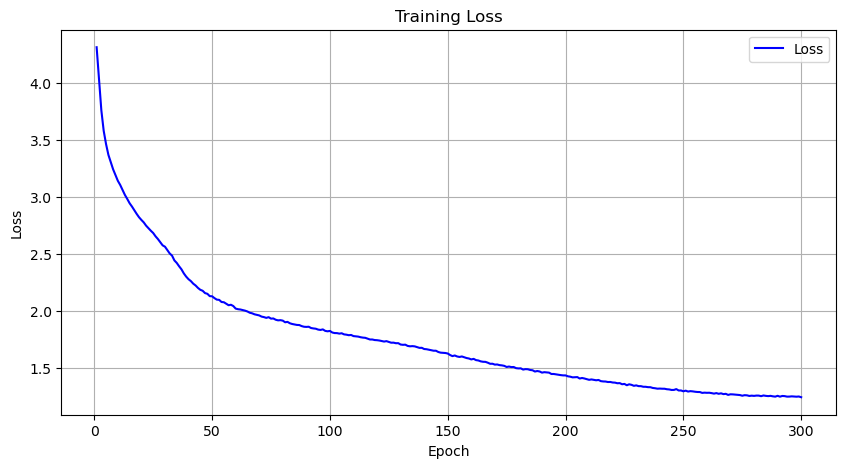

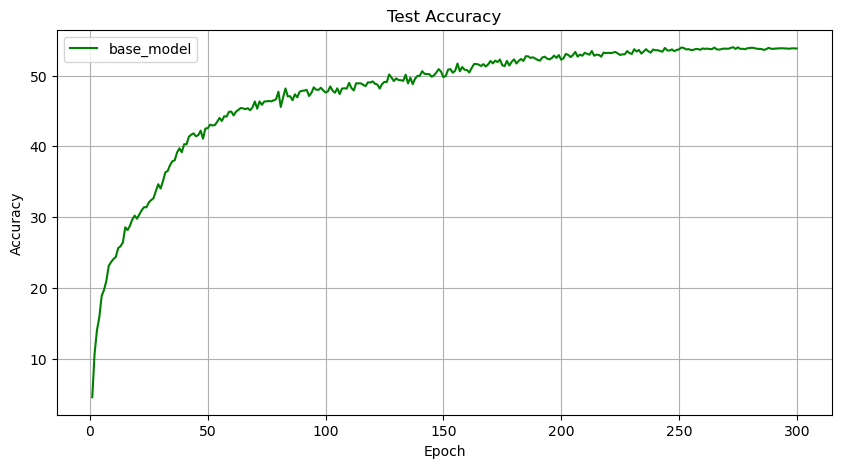

In [8]:
base_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=4,#6
    heads=8,
    mlp_dim=256,
    dropout=0.1,
).to("cpu") #cpu for feature visualisation
base_model_load_path = f"save_model/cifar-100/vit_base/best_model.pt"
print(f"Total parameters:{f.helpers.count_parameters(base_model)}")
f.data_loader.load_checkpoint(base_model,base_model_load_path)
base_model_acc=test(base_model,test_loader,'cuda')
base_model_loss_list,base_model_accuracy_list=f.data_loader.load_lists_from_file('save_model/cifar-100/vit_base/loss_and_accuracy')
f.plotter.plot_loss_accuracy(base_model_loss_list,base_model_accuracy_list,'base_model')

CNN pre ViT feautre extraction + CNN patch embedding

In [ ]:
ViT_CNN_model = ViT_CNN(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=2,
    heads=4,
    mlp_dim=256,
    dropout=0.1,
).to("cpu")#cpu for feature visualisation
ViT_CNN_model_load_path = "save_model/cifar-100/ViT_CNN/best_model.pt"
print(f"Total parameters:{f.helpers.count_parameters(ViT_CNN_model)}")
f.data_loader.load_checkpoint(ViT_CNN_model,ViT_CNN_model_load_path)
ViT_CNN_model_acc=test(ViT_CNN_model,test_loader,'cuda')
ViT_CNN_model_loss_list,ViT_CNN_model_accuracy_list=f.data_loader.load_lists_from_file('save_model/cifar-100/ViT_CNN/loss_and_accuracy')
f.plotter.plot_loss_accuracy(ViT_CNN_model_loss_list,ViT_CNN_model_accuracy_list,'ViT_CNN_model')

In [ ]:
f.plotter.plot_accuracy_comparison(ViT_CNN_model_accuracy_list,base_model_accuracy_list,'ViT_CNN_model','ViT_base_model')

In [ ]:
f.data_loader.create_comparison_table([base_model,ViT_CNN_model],[base_model_acc,ViT_CNN_model_acc])

In [ ]:
base_model.to('cpu')
x,img=f.data_loader.get_random_image('bee')
plot_feature_maps(base_model,x,img,device='cpu')

In [ ]:
ViT_CNN_model.to('cpu')
plot_feature_maps(ViT_CNN_model,x,img,device='cpu')

CNN_ViT dynamic model

In [ ]:
CNN_ViT_dynamic_model= CNN_ViT_dynamic(
    image_size=32,
    dim=64,
    patch_size=4,
    num_classes=100,
    depth=4,
    heads=4,
    mlp_dim=256,
    dropout=0.1,
    inference=False
).to("cuda")
CNN_ViT_dynamic_load_path ='save_model/cifar-100/CNN_ViT_dynamic/best_model.pt'

#Explicar num parametros dependiendo de ruta tomada
#Comprarar % de 'early_exits'
#Ver tiempo de inferencia con 1 ejemplo para este y el modelo base

print(f"Total parameters:{f.helpers.count_parameters(CNN_ViT_dynamic_model)}")
f.data_loader.load_checkpoint(CNN_ViT_dynamic_model,CNN_ViT_dynamic_load_path)
CNN_ViT_dynamic_model_acc=test(CNN_ViT_dynamic_model,test_loader,'cuda')
CNN_ViT_dynamic_model_loss_list,CNN_ViT_dynamic_model_accuracy_list=f.data_loader.load_lists_from_file('save_model/cifar-100/CNN_ViT_dynamic/loss_and_accuracy')
f.plotter.plot_loss_accuracy(CNN_ViT_dynamic_model_loss_list,CNN_ViT_dynamic_model_accuracy_list,'CNN_ViT_dynamic_model')

Test dynamic model inference time with batch=1 and compare to base model

In [ ]:
CNN_ViT_dynamic_model= CNN_ViT_dynamic(
    image_size=32,
    dim=64,
    patch_size=4,
    num_classes=100,
    depth=4,
    heads=8,
    mlp_dim=256,
    dropout=0.1,
    inference=True
).to("cuda")
f.data_loader.load_checkpoint(CNN_ViT_dynamic_model,CNN_ViT_dynamic_load_path)


Knowledge distillation

Response based kd


In [10]:
student_response_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=False
).to("cuda")
student_response_kd_path = 'save_model/cifar-100/vit_student_kd/best_model.pt'
print(f"Total parameters:{f.helpers.count_parameters(student_response_kd)}")
f.data_loader.load_checkpoint(student_response_kd,student_response_kd_path)
student_kd_acc = test(student_response_kd,test_loader,'cuda')
student_kd_loss_list,student_kd_accuracy_list = f.data_loader.load_lists_from_file('save_model/cifar-100/vit_student_kd/loss_and_accuracy')
f.plotter.plot_loss_accuracy(student_kd_loss_list,student_kd_accuracy_list,'student_kd')

Total parameters:408740


Test Accuracy: 54.89%


FileNotFoundError: save_model/cifar-100/vit_student_kd/loss_and_accuracy not found.

In [11]:
student_base_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
).to("cuda")
student_base_load_path = "save_model/cifar-100/vit_student_base/best_model.pt"
print(f"Total parameters:{f.helpers.count_parameters(student_base_model)}")
f.data_loader.load_checkpoint(student_base_model,student_base_load_path)
student_base_model_acc = test(student_base_model,test_loader,'cuda')
student_base_model_loss_list,student_base_model_accuracy_list = f.data_loader.load_lists_from_file('ssave_model/cifar-100/vit_student_base/loss_and_accuracy')
f.plotter.plot_loss_accuracy(student_base_model_loss_list,student_base_model_accuracy_list,'student_base_model')


Total parameters:408740


FileNotFoundError: [Errno 2] No such file or directory: 'save_model/cifar-100/vit_16_student_base_cifar-100/best_model.pt'

In [ ]:
f.plotter.plot_accuracy_comparison(student_kd_accuracy_list,student_base_model_accuracy_list,'student_kd','student_base_model')

In [ ]:
f.data_loader.create_comparison_table([student_kd,student_base_model,base_model],[student_kd_acc,student_base_model_acc,base_model_acc])

In [ ]:
#Add inference time comparison and co2 eq 

CNN_ViT early exit


In [1]:
import torch
from functions.train_test import test
from models.vit import ViT
from models.ViT_CNN import CNN_ViT
from models.ViT_early_exit import ViT_early_exit
from models.ViT_CNN_early_exit import ViT_CNN_early_exit

# from models.prueba_early_exit import prueba_early_exit
from functions.helpers import count_parameters
from functions.plotter import plot_feature_maps, plot_loss_accuracy
import functions as f


In [2]:
torch.manual_seed(42)

In [ ]:
train_loader, test_loader = f.data_loader.get_data_loader(
    80, 2, "datasets/cifar-100/cifar-100-python", download=True
)

In [3]:
ViT_CNN_early_exit = ViT_early_exit(
    image_size=32,
    dim=64,
    patch_size=4,
    num_classes=100,
    depth=6,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    early_exit=True
).to("cuda")
ViT_early_exit_load_path='save_model/cifar-100/ViT_early_exit/best_model.pt'
print(f"Total parameters:{f.helpers.count_parameters(ViT_CNN_early_exit)}")
f.data_loader.load_checkpoint(ViT_CNN_early_exit,ViT_early_exit_load_path)



Total parameters:833068


In [ ]:
ViT_early_exitacc = test(CNN_ViT_early_exit,test_loader,'cuda')


Files already downloaded and verified
Files already downloaded and verified
0.4834570288658142
0.2845933735370636
0.3644922077655792
0.247736856341362
0.22136034071445465
0.49679064750671387
0.2590273320674896
0.4102146029472351
0.48102062940597534
0.2924717664718628
0.5334819555282593
0.5773522853851318
0.4838399589061737
0.61345374584198
0.2468777894973755
0.21573886275291443
0.34124335646629333
0.41585373878479004
0.3141920864582062
0.29930445551872253
0.22691024839878082
0.43266385793685913
0.39763253927230835
0.3375605046749115
0.3894180655479431
0.25794556736946106
0.32624927163124084
0.3784258961677551
0.3623449504375458
0.36164507269859314
0.2220527082681656
0.1812441349029541
0.31578391790390015
0.36190930008888245
0.44839468598365784
0.5247271656990051
0.28315311670303345
0.48531413078308105
0.5447648763656616
0.305090069770813
0.24400900304317474
0.2826404571533203
0.7261688113212585
0.23427724838256836
0.31817156076431274
0.36072400212287903
0.38487741351127625
0.2636644244

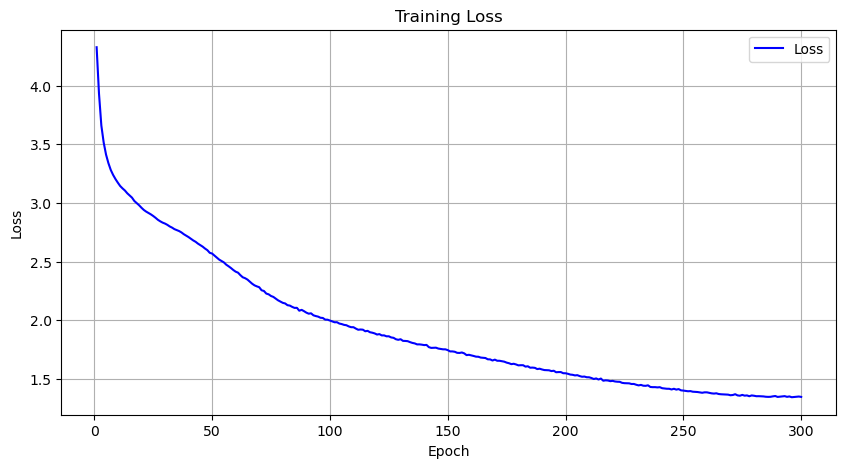

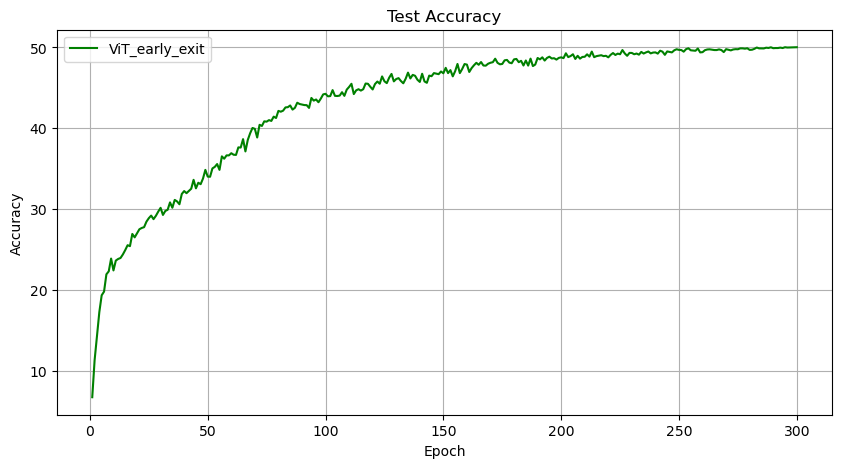

In [4]:
train_loader_1_example, test_loader_1_example = f.data_loader.get_data_loader(
    1, 2, "datasets/cifar-100/cifar-100-python", download=True
)

ViT_early_exit_acc,num_early_exits = test(ViT_CNN_early_exit,test_loader_1_example,'cuda')
ViT_early_exit_loss_list,ViT_early_exit_model_accuracy_list = f.data_loader.load_lists_from_file('save_model/cifar-100/ViT_early_exit/loss_and_accuracy')
f.plotter.plot_loss_accuracy(ViT_early_exit_loss_list,ViT_early_exit_model_accuracy_list,'ViT_early_exit')

In [ ]:
num_early_exits

In [ ]:
f.data_loader.create_comparison_table([base_model,CNN_ViT_early_exit],[base_model_acc,CNN_ViT_early_exit_acc])

CIFAR-10


In [ ]:
train_loader, test_loader = f.data_loader.get_data_loader(
    80, 2, "datasets/cifar-10/cifar-10-python", download=True
)

In [ ]:
base_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=4,#6
    heads=8,
    mlp_dim=256,
    dropout=0.1,
).to("cpu") #cpu for feature visualisation
base_model_load_path = f"save_model/cifar-10/vit_base/best_model.pt"
print(f"Total parameters:{f.helpers.count_parameters(base_model)}")
f.data_loader.load_checkpoint(base_model,base_model_load_path)
base_model_acc=test(base_model,test_loader,'cuda')
base_model_loss_list,base_model_accuracy_list=f.data_loader.load_lists_from_file('save_model/cifar-10/vit_base/loss_and_accuracy')
f.plotter.plot_loss_accuracy(base_model_loss_list,base_model_accuracy_list,'base_model')

In [ ]:
ViT_CNN_model = ViT_CNN(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=2,
    heads=4,
    mlp_dim=256,
    dropout=0.1,
).to("cpu")#cpu for feature visualisation
ViT_CNN_model_load_path = "save_model/cifar-10/ViT_CNN/best_model.pt"
print(f"Total parameters:{f.helpers.count_parameters(ViT_CNN_model)}")
f.data_loader.load_checkpoint(ViT_CNN_model,ViT_CNN_model_load_path)
ViT_CNN_model_acc=test(ViT_CNN_model,test_loader,'cuda')
ViT_CNN_model_loss_list,ViT_CNN_model_accuracy_list=f.data_loader.load_lists_from_file('save_model/cifar-10/ViT_CNN/loss_and_accuracy')
f.plotter.plot_loss_accuracy(ViT_CNN_model_loss_list,ViT_CNN_model_accuracy_list,'ViT_CNN_model')

In [ ]:
f.plotter.plot_accuracy_comparison(ViT_CNN_model_accuracy_list,base_model_accuracy_list,'ViT_CNN_model','ViT_base_model')

In [ ]:
f.data_loader.create_comparison_table([base_model,ViT_CNN_model],[base_model_acc,ViT_CNN_model_acc])

In [ ]:
base_model.to('cpu')
x,img=f.data_loader.get_random_image('bee')
plot_feature_maps(base_model,x,img,device='cpu')

In [ ]:
ViT_CNN_model.to('cpu')
plot_feature_maps(ViT_CNN_model,x,img,device='cpu')

Knowledge distillation

Response based

In [ ]:
student_response_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=False
).to("cuda")
student_response_kd_path = 'save_model/cifar-10/vit_student_kd/best_model.pt'
print(f"Total parameters:{f.helpers.count_parameters(student_response_kd)}")
f.data_loader.load_checkpoint(student_response_kd,student_response_kd_path)
student_kd_acc = test(student_response_kd,test_loader,'cuda')
student_kd_loss_list,student_kd_accuracy_list = f.data_loader.load_lists_from_file('save_model/cifar-10/vit_student_kd/loss_and_accuracy')
f.plotter.plot_loss_accuracy(student_kd_loss_list,student_kd_accuracy_list,'student_kd')

In [ ]:
student_base_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
).to("cuda")
student_base_load_path = "save_model/cifar-10/vit_student_base/best_model.pt"
print(f"Total parameters:{f.helpers.count_parameters(student_base_model)}")
f.data_loader.load_checkpoint(student_base_model,student_base_load_path)
student_base_model_acc = test(student_base_model,test_loader,'cuda')
student_base_model_loss_list,student_base_model_accuracy_list = f.data_loader.load_lists_from_file('save_model/cifar-10/vit_student_base/loss_and_accuracy')
f.plotter.plot_loss_accuracy(student_base_model_loss_list,student_base_model_accuracy_list,'student_base_model')
